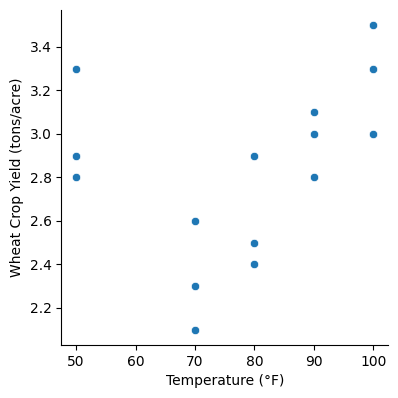

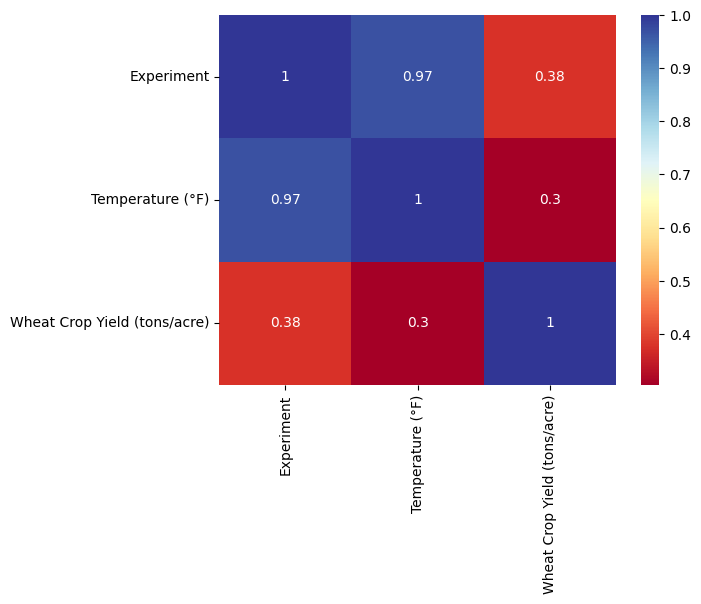

(12, 2)
(3, 2)
(12,)
(3,)
[[-1.62018517 -1.62746694]
 [-1.38873015 -1.62746694]
 [-1.15727512 -1.62746694]
 [-0.9258201  -0.46499055]
 [-0.69436507 -0.46499055]
 [-0.46291005 -0.46499055]
 [-0.23145502  0.11624764]
 [ 0.          0.11624764]
 [ 0.23145502  0.11624764]
 [ 0.46291005  0.69748583]
 [ 0.69436507  0.69748583]
 [ 0.9258201   0.69748583]
 [ 1.15727512  1.27872403]
 [ 1.38873015  1.27872403]
 [ 1.62018517  1.27872403]]
Coefficient of determination:  0.4616438936852666
R^2:  0.4616438936852666
MAE:  0.2496425089372765
MSE:  0.08598743364749213
RMSE:  0.2932361397363772


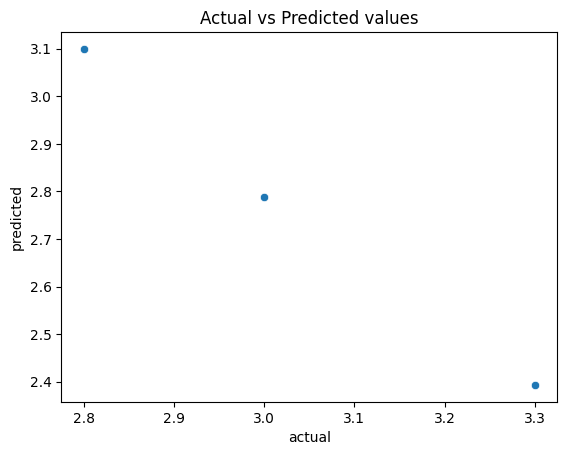

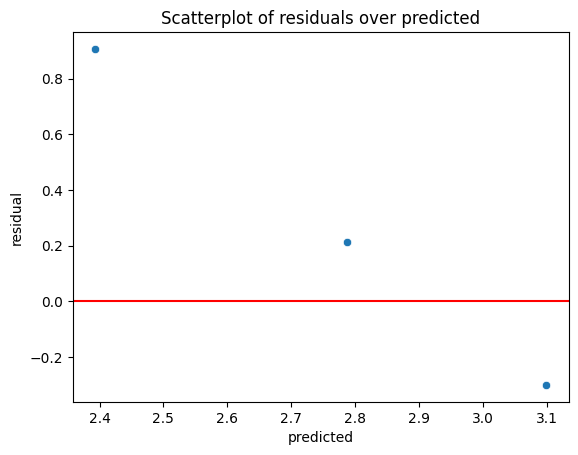

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


#Read the given CSV file, and view some sample records
#Read the given CSV file, and view some sample records
advertising = pd.read_csv( "experiment.csv" )
df = pd.DataFrame(advertising)
ad = df.drop(['Experiment'], axis=1)
advertising.head()


#to plot all the scatterplots in a single plot


sns.pairplot(advertising, x_vars=['Temperature (°F)'], y_vars='Wheat Crop Yield (tons/acre)', height=4, kind='scatter')
plt.show()


#To plot heatmap to find out correlations
sns.heatmap(advertising.corr(), cmap='RdYlBu', annot=True)
plt.show()


#AS TV is impacting the sales heavily so for analysisng TV
X = advertising.drop('Wheat Crop Yield (tons/acre)', axis=1)
y = advertising['Wheat Crop Yield (tons/acre)']
X.head()


#For traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )


#To check how data is assigned
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#for linearreggession add extra column
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)


# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))


y_pred = LR.predict(X_train)


print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))


y_pred_test = LR.predict(X_test)


# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()


# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()


sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()


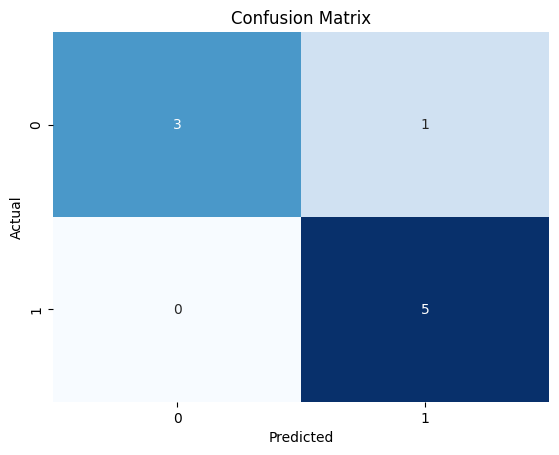

Model Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


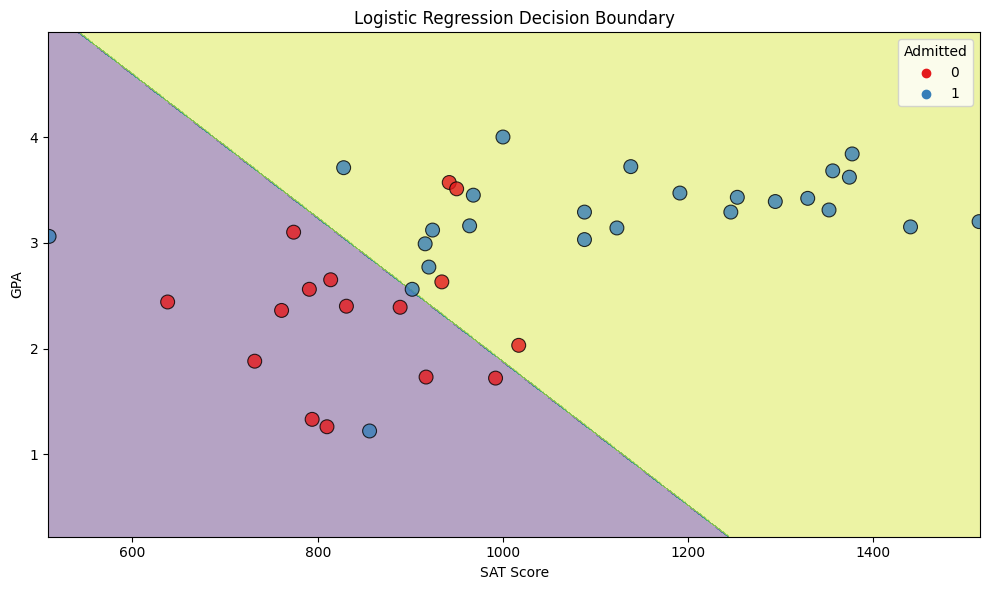

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'SAT.score': [638, 889, 810, 1017, 992, 968, 774, 934, 831, 1000, 732, 794, 791, 814, 917, 902, 856, 510, 761, 916, 942, 1352, 1253, 1138, 950, 828, 1440, 924, 920, 1191, 1088, 1294, 1088, 1374, 1514, 964, 1356, 1123, 1329, 1246, 1377],
    'GPA': [2.44, 2.39, 1.26, 2.03, 1.72, 3.45, 3.10, 2.63, 2.40, 4.00, 1.88, 1.33, 2.56, 2.65, 1.73, 2.56, 1.22, 3.06, 2.36, 2.99, 3.57, 3.31, 3.43, 3.72, 3.51, 3.71, 3.15, 3.12, 2.77, 3.47, 3.03, 3.39, 3.29, 3.62, 3.20, 3.16, 3.68, 3.14, 3.42, 3.29, 3.84],
    'admitted': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df[['SAT.score', 'GPA']]
y = df['admitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict admission on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)

# Creating a meshgrid for plotting
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# Predicting on the meshgrid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot decision boundary and data points
plt.figure(figsize=(10, 6))


# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)


# Plot admitted and not admitted students
sns.scatterplot(x='SAT.score', y='GPA', hue='admitted', data=df, palette='Set1', edgecolor='k', s=100, alpha=0.8)


# Plot settings
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.legend(title='Admitted')
plt.tight_layout()
plt.show()
